In [1]:
import analysis_nx
import nx_approx_methods
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
g = analysis_nx.load_graph('data/wiki-Vote/wiki-Vote.txt')
lscc_view = analysis_nx.calculate_largest_strongly_connected_comp(g)
lwcc_view = analysis_nx.calculate_largest_weakly_connected_comp(g)

lscc = lscc_view.copy(as_view=False)
lwcc = lwcc_view.copy(as_view=False)

In [3]:
acc_ar = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
#acc_ar = [0.5, 0.6]
s_median_ar, s_mean_ar, s_diam_ar, s_eff_diam_ar = [], [], [], []
w_median_ar, w_mean_ar, w_diam_ar, w_eff_diam_ar = [], [], [], []

In [4]:
%%time
for accuracy in acc_ar:

    print('=====LSCC=====')
    #print('LSCC edges: \t', lscc.num_edges())
    #print('LSCC nodes: \t', lscc.num_vertices())
    print('accuracy is ', accuracy * 100, '% corresponds to ', int(accuracy * lscc.number_of_nodes()), 'sampled number of nodes of LSCC')

    n_samples = int(accuracy * lscc.number_of_nodes())
    bfs_graph_lscc_view = nx_approx_methods.method_2(lscc, n_samples)
    bfs_graph_lscc = bfs_graph_lscc_view.copy(as_view=False)
    lscc_dists = analysis_nx.compute_shortest_path_distances_parallel_mp(bfs_graph_lscc)
    s_median, s_mean, s_diam, s_eff_diam = analysis_nx.compute_stats(lscc_dists)
    s_median_ar.append(s_median)
    s_mean_ar.append(s_mean)
    s_diam_ar.append(s_diam)
    s_eff_diam_ar.append(s_eff_diam)

    print('=====LWCC=====')
    #print('LWCC edges: \t', lwcc.num_edges())
    #print('LWCC nodes: \t', lwcc.num_vertices())
    print('accuracy is ', accuracy * 100, '% corresponds to ', int(accuracy * lwcc.number_of_nodes()), 'sampled number of nodes of LWCC')

    n_samples = int(accuracy * lwcc.number_of_nodes())
    bfs_graph_lwcc_view = nx_approx_methods.method_2(lwcc, n_samples)
    bfs_graph_lwcc = bfs_graph_lwcc_view.copy(as_view=False)
    lwcc_dists = analysis_nx.compute_shortest_path_distances_parallel_mp(bfs_graph_lwcc)
    s_median, s_mean, s_diam, s_eff_diam = analysis_nx.compute_stats(lwcc_dists)
    w_median_ar.append(s_median)
    w_mean_ar.append(s_mean)
    w_diam_ar.append(s_diam)
    w_eff_diam_ar.append(s_eff_diam)

=====LSCC=====
accuracy is  2.0 % corresponds to  26 sampled number of nodes of LSCC
taking 26 samples
4 cores used
=====LWCC=====
accuracy is  2.0 % corresponds to  141 sampled number of nodes of LWCC
taking 141 samples
4 cores used
=====LSCC=====
accuracy is  3.0 % corresponds to  39 sampled number of nodes of LSCC
taking 39 samples
4 cores used
=====LWCC=====
accuracy is  3.0 % corresponds to  211 sampled number of nodes of LWCC
taking 211 samples
4 cores used
=====LSCC=====
accuracy is  4.0 % corresponds to  52 sampled number of nodes of LSCC
taking 52 samples
4 cores used
=====LWCC=====
accuracy is  4.0 % corresponds to  282 sampled number of nodes of LWCC
taking 282 samples
4 cores used
=====LSCC=====
accuracy is  5.0 % corresponds to  65 sampled number of nodes of LSCC
taking 65 samples
4 cores used
=====LWCC=====
accuracy is  5.0 % corresponds to  353 sampled number of nodes of LWCC
taking 353 samples
4 cores used
=====LSCC=====
accuracy is  6.0 % corresponds to  78 sampled num

In [5]:
print(s_median_ar, s_mean_ar, s_diam_ar, s_eff_diam_ar)
print(w_median_ar, w_mean_ar, w_diam_ar, w_eff_diam_ar)

[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0] [3.6552629109716603, 3.397546239715826, 3.2799700803345075, 3.2831749057898065, 3.2246901251981575, 3.1844607170199848, 3.1143915739027324, 3.1184249276599854, 3.1263149701903767, 3.0524788667707501, 3.000759608675724, 2.9862143803966665, 2.952805949519032, 2.9289617737374347, 2.9472817887583656, 2.9395299963002848] [10, 11, 9, 10, 9, 9, 9, 10, 9, 8, 9, 8, 8, 8, 9, 8] [5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0] [3.2879161492919975, 3.2699017768580245, 3.2646373936285826, 3.259532559013159, 3.2553067439272385, 3.2556790373790796, 3.2531267001861628, 3.2516374062066054, 3.250855085234531, 3.248606142769852, 3.24796778808419, 3.2475259149329894, 3.2473003517279841, 3.2472195158999426, 3.2471810607983969, 3.2471459304608388] [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7] [4.0, 4.0, 4.0, 4.0, 

In [10]:
s_median_ar = [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
s_mean_ar = [3.6552629109716603, 3.397546239715826, 3.2799700803345075, 3.2831749057898065, 3.2246901251981575, 3.1844607170199848, 3.1143915739027324, 3.1184249276599854, 3.1263149701903767, 3.0524788667707501, 3.000759608675724, 2.9862143803966665, 2.952805949519032, 2.9289617737374347, 2.9472817887583656, 2.9395299963002848]
s_diam_ar = [10, 11, 9, 10, 9, 9, 9, 10, 9, 8, 9, 8, 8, 8, 9, 8]
s_eff_diam_ar = [5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
w_median_ar = [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
w_mean_ar = [3.2879161492919975, 3.2699017768580245, 3.2646373936285826, 3.259532559013159, 3.2553067439272385, 3.2556790373790796, 3.2531267001861628, 3.2516374062066054, 3.250855085234531, 3.248606142769852, 3.24796778808419, 3.2475259149329894, 3.2473003517279841, 3.2472195158999426, 3.2471810607983969, 3.2471459304608388]
w_diam_ar = [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
w_eff_diam_ar = [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]

In [6]:
# enter exact values for wiki:
s_ex_median, s_ex_mean, s_ex_dia, s_ex_eff_dia = 3, 2.877, 9, 4
w_ex_median, w_ex_mean, w_ex_dia, w_ex_eff_dia = 3, 3.247, 7, 4

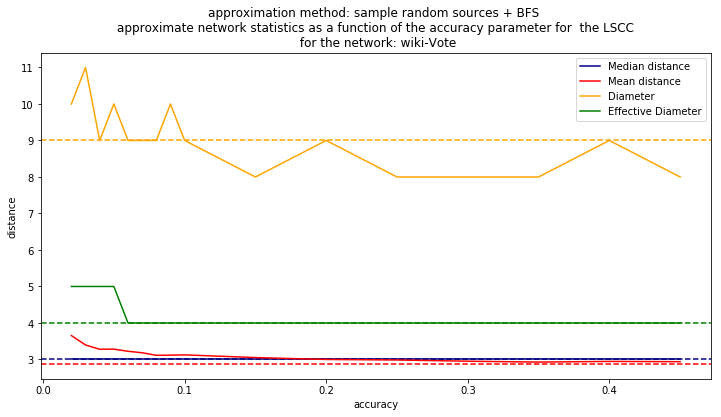

In [7]:
plt.figure(figsize=(12,6))
plt.plot(acc_ar, s_median_ar, label='Median distance', color='navy')
plt.axhline(s_ex_median, linestyle='dashed', color='navy')

plt.plot(acc_ar, s_mean_ar, label='Mean distance', color='r')
plt.axhline(s_ex_mean, linestyle='dashed', color='r')

plt.plot(acc_ar, s_diam_ar, label='Diameter', color='orange')
plt.axhline(s_ex_dia, linestyle='dashed', color='orange')

plt.plot(acc_ar, s_eff_diam_ar, label='Effective Diameter', color='g')
plt.axhline(s_ex_eff_dia, linestyle='dashed', color='g')

plt.legend()
title = 'approximation method: sample random sources + BFS \n approximate network statistics as a function of the accuracy parameter for  the LSCC \n for the network: wiki-Vote'
plt.title(title)
plt.xlabel('accuracy')
plt.ylabel('distance')
plt.savefig('2_2_' + 'wiki-Vote' + '_lscc', dpi=300, bordes='tight')

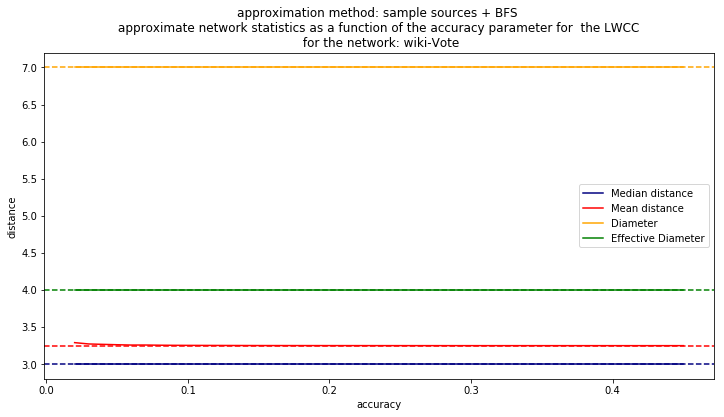

In [8]:
plt.figure(figsize=(12,6))
plt.plot(acc_ar, w_median_ar, label='Median distance', color='navy')
plt.axhline(w_ex_median, linestyle='dashed', color='navy')

plt.plot(acc_ar, w_mean_ar, label='Mean distance', color='r')
plt.axhline(w_ex_mean, linestyle='dashed', color='r')

plt.plot(acc_ar, w_diam_ar, label='Diameter', color='orange')
plt.axhline(w_ex_dia, linestyle='dashed', color='orange')

plt.plot(acc_ar, w_eff_diam_ar, label='Effective Diameter', color='g')
plt.axhline(w_ex_eff_dia, linestyle='dashed', color='g')
plt.legend()
title = 'approximation method: sample sources + BFS \n approximate network statistics as a function of the accuracy parameter for  the LWCC \n for the network: wiki-Vote'
plt.title(title)
plt.xlabel('accuracy')
plt.ylabel('distance')
plt.savefig('2_2_' + 'wiki-Vote' + '_lwcc', dpi=300, bordes='tight')